In [1]:
import pandas as pd

In [3]:
df_players = pd.read_csv('data/players.csv')

In [4]:
df_players.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [7]:
#clean dataset
df_players.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

In [10]:
df_players.dtypes


nflId           int64
height         object
weight          int64
birthDate      object
collegeName    object
position       object
displayName    object
dtype: object

In [11]:

df_players.head

<bound method NDFrame.head of         nflId height  weight   birthDate             collegeName position  \
0     2539334     72     190  1990-09-10              Washington       CB   
1     2539653     70     186  1988-11-01  Southeastern Louisiana       CB   
2     2543850     69     186  1991-12-18                  Purdue       SS   
3     2555162     73     227  1994-11-04         Louisiana State      MLB   
4     2555255     75     232  1993-07-01               Minnesota      OLB   
...       ...    ...     ...         ...                     ...      ...   
1298  2553798    6-2     235  09/17/1991              Vanderbilt       LS   
1299  2556814    6-2     200  05/17/1994                    Duke       WR   
1300  2552576     78     231  1992-04-25            Oregon State       QB   
1301  2561469     69     187  1993-03-15      Alabama-Birmingham       CB   
1302  2558095    6-2     196  10/12/1995                     LSU       WR   

             displayName  
0        Desmond T

In [12]:
df_players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [13]:
def convert_height_to_cm(height):
    try:
        # Si le format est "6-2" (pieds-pouces)
        if '-' in str(height):
            feet, inches = map(int, height.split('-'))
            total_inches = feet * 12 + inches
        else:
            # Si le format est déjà en pouces
            total_inches = float(height)
        
        # Convertir les pouces en centimètres
        return total_inches * 2.54
    except:
        return None  # Gérer les valeurs incorrectes

# Appliquer la fonction à la colonne height
df_players['height'] = df_players['height'].apply(convert_height_to_cm)

# Vérifier le résultat
print(df_players['height'].head())


0    182.88
1    177.80
2    175.26
3    185.42
4    190.50
Name: height, dtype: float64


In [14]:
# Convertir la colonne birthDate en format datetime uniforme
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce', infer_datetime_format=True)

# Vérifier les résultats
print(df_players['birthDate'].head())


0   1990-09-10
1   1988-11-01
2   1991-12-18
3   1994-11-04
4   1993-07-01
Name: birthDate, dtype: datetime64[ns]


C:\Users\Charles\AppData\Local\Temp\ipykernel_21724\3974232657.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], errors='coerce', infer_datetime_format=True)


In [15]:
from datetime import datetime

df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Vérifier les âges
print(df_players[['birthDate', 'age']].head())


   birthDate   age
0 1990-09-10  35.0
1 1988-11-01  37.0
2 1991-12-18  34.0
3 1994-11-04  31.0
4 1993-07-01  32.0


C:\Users\Charles\AppData\Local\Temp\ipykernel_21724\2792829794.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='age', data=df_players, palette='Set3')


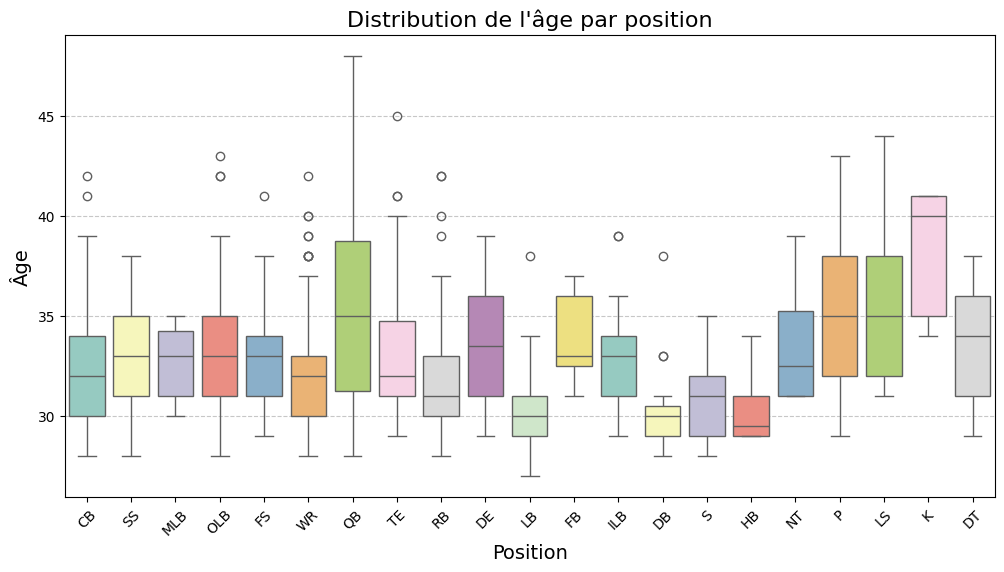

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vérifiez d'abord que vous avez une colonne 'age' calculée :
from datetime import datetime

df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Créez le graphique
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='age', data=df_players, palette='Set3')

# Ajouter des titres et labels
plt.title('Distribution de l\'âge par position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Âge', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


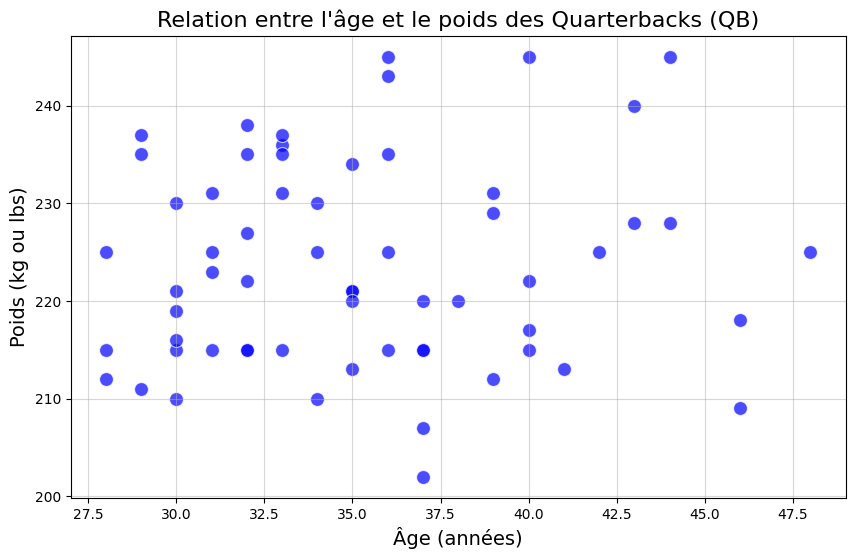

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Calculer l'âge si ce n'est pas déjà fait
df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Filtrer les joueurs qui sont des Quarterbacks (QB)
df_qb = df_players[df_players['position'] == 'QB']

# Créer un scatter plot pour l'âge et le poids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='weight', data=df_qb, color='blue', s=100, alpha=0.7)

# Ajouter des titres et labels
plt.title('Relation entre l\'âge et le poids des Quarterbacks (QB)', fontsize=16)
plt.xlabel('Âge (années)', fontsize=14)
plt.ylabel('Poids (kg ou lbs)', fontsize=14)
plt.grid(alpha=0.5)

# Afficher le graphique
plt.show()


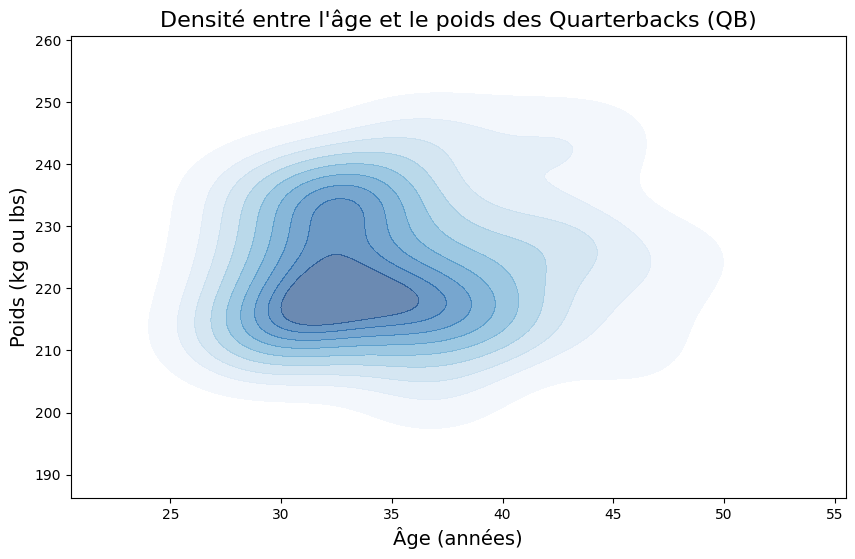

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Calculer l'âge si ce n'est pas déjà fait
df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Filtrer les joueurs qui sont des Quarterbacks (QB)
df_qb = df_players[df_players['position'] == 'QB']

# Filtrer les lignes où il n'y a pas de valeurs manquantes
df_qb = df_qb.dropna(subset=['age', 'weight'])

# Créer un plot de densité bidimensionnelle (KDE) pour l'âge et le poids
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_qb, x='age', y='weight', cmap='Blues', fill=True, levels=10, alpha=0.6)

# Ajouter des titres et labels
plt.title('Densité entre l\'âge et le poids des Quarterbacks (QB)', fontsize=16)
plt.xlabel('Âge (années)', fontsize=14)
plt.ylabel('Poids (kg ou lbs)', fontsize=14)

# Afficher le graphique
plt.show()


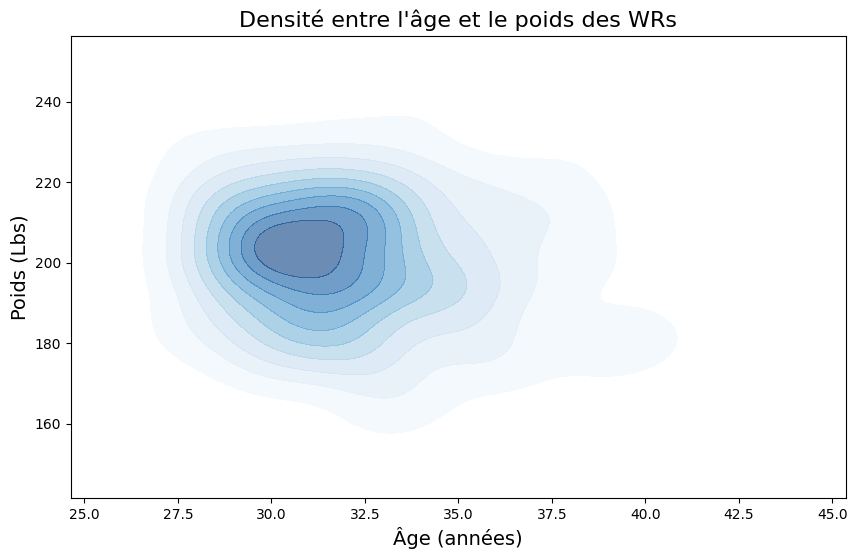

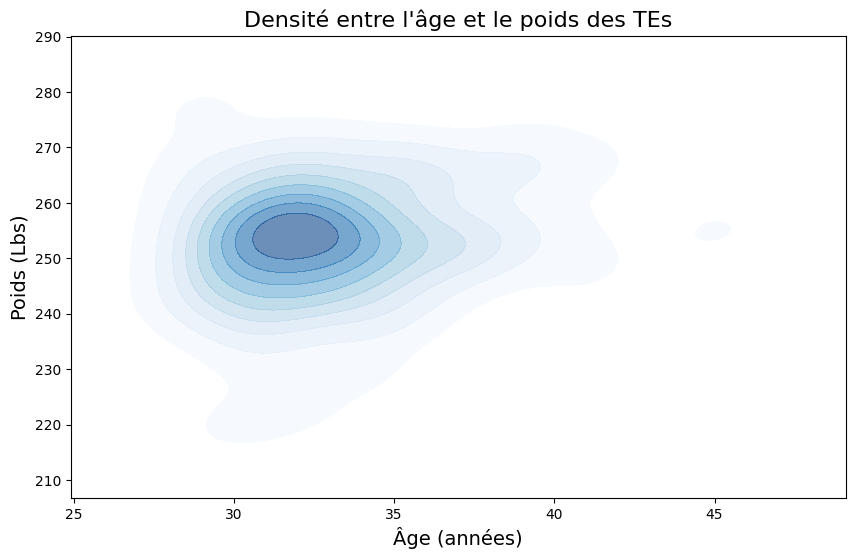

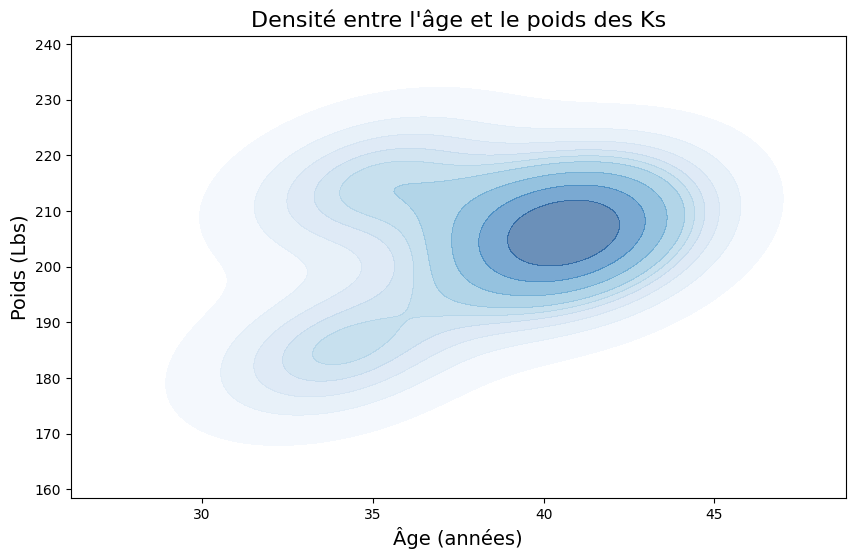

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Calculer l'âge si ce n'est pas déjà fait
df_players['age'] = df_players['birthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)

# Positions à analyser
positions = ['WR', 'TE', 'K']

# Créer un graphique pour chaque position
for position in positions:
    df_pos = df_players[df_players['position'] == position]
    
    # Filtrer les lignes où il n'y a pas de valeurs manquantes
    df_pos = df_pos.dropna(subset=['age', 'weight'])

    # Créer un plot de densité bidimensionnelle (KDE) pour l'âge et le poids
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_pos, x='age', y='weight', cmap='Blues', fill=True, levels=10, alpha=0.6)

    # Ajouter un titre personnalisé pour chaque position
    plt.title(f'Densité entre l\'âge et le poids des {position}s', fontsize=16)
    plt.xlabel('Âge (années)', fontsize=14)
    plt.ylabel('Poids (Lbs)', fontsize=14)

    # Afficher le graphique
    plt.show()


C:\Users\Charles\AppData\Local\Temp\ipykernel_21724\4022788043.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts.index, y=college_counts.values, palette='Blues')


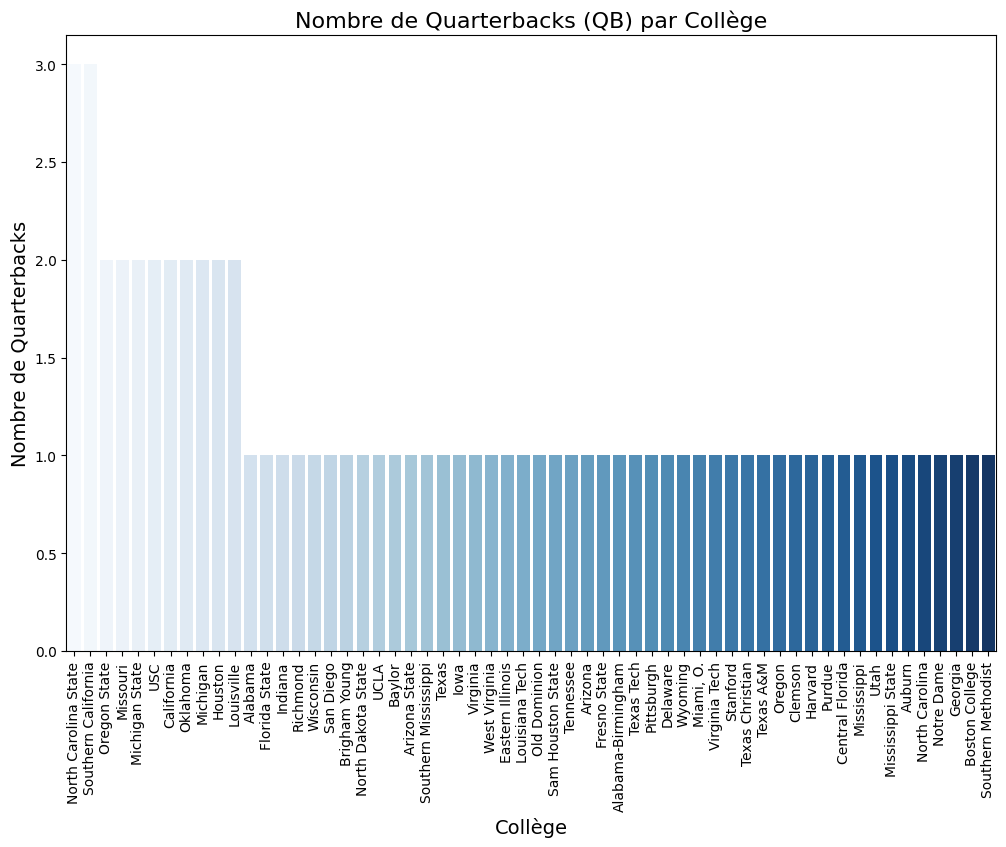

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les joueurs qui sont des Quarterbacks (QB)
df_qb = df_players[df_players['position'] == 'QB']

# Filtrer les lignes où il n'y a pas de valeurs manquantes pour collegeName
df_qb = df_qb.dropna(subset=['collegeName'])

# Compter le nombre de quarterbacks par collegeName
college_counts = df_qb['collegeName'].value_counts()

# Créer un barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=college_counts.index, y=college_counts.values, palette='Blues')

# Ajouter des titres et labels
plt.title('Nombre de Quarterbacks (QB) par Collège', fontsize=16)
plt.xlabel('Collège', fontsize=14)
plt.ylabel('Nombre de Quarterbacks', fontsize=14)

# Rotation des labels des x pour les rendre plus lisibles
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


C:\Users\Charles\AppData\Local\Temp\ipykernel_21724\1119856641.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts.values, y=college_counts.index, palette='Blues_r')  # '_r' inverse la palette


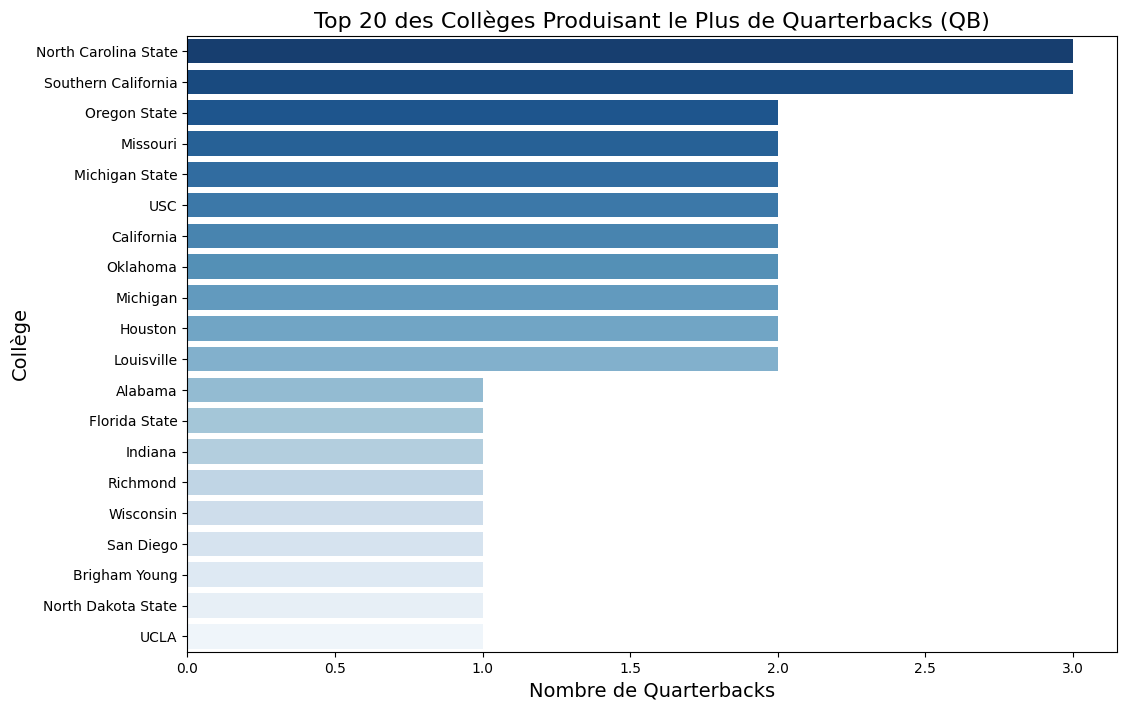

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les joueurs qui sont des Quarterbacks (QB)
df_qb = df_players[df_players['position'] == 'QB']

# Filtrer les lignes où il n'y a pas de valeurs manquantes pour collegeName
df_qb = df_qb.dropna(subset=['collegeName'])

# Compter le nombre de quarterbacks par collegeName et sélectionner les 20 premiers
college_counts = df_qb['collegeName'].value_counts().head(20)

# Créer un barplot horizontal avec une palette inversée
plt.figure(figsize=(12, 8))
sns.barplot(x=college_counts.values, y=college_counts.index, palette='Blues_r')  # '_r' inverse la palette

# Ajouter des titres et labels
plt.title('Top 20 des Collèges Produisant le Plus de Quarterbacks (QB)', fontsize=16)
plt.xlabel('Nombre de Quarterbacks', fontsize=14)
plt.ylabel('Collège', fontsize=14)

# Afficher le graphique
plt.show()


C:\Users\Charles\AppData\Local\Temp\ipykernel_21724\3503636300.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=college_counts_players.values, y=college_counts_players.index, palette='Blues_r')


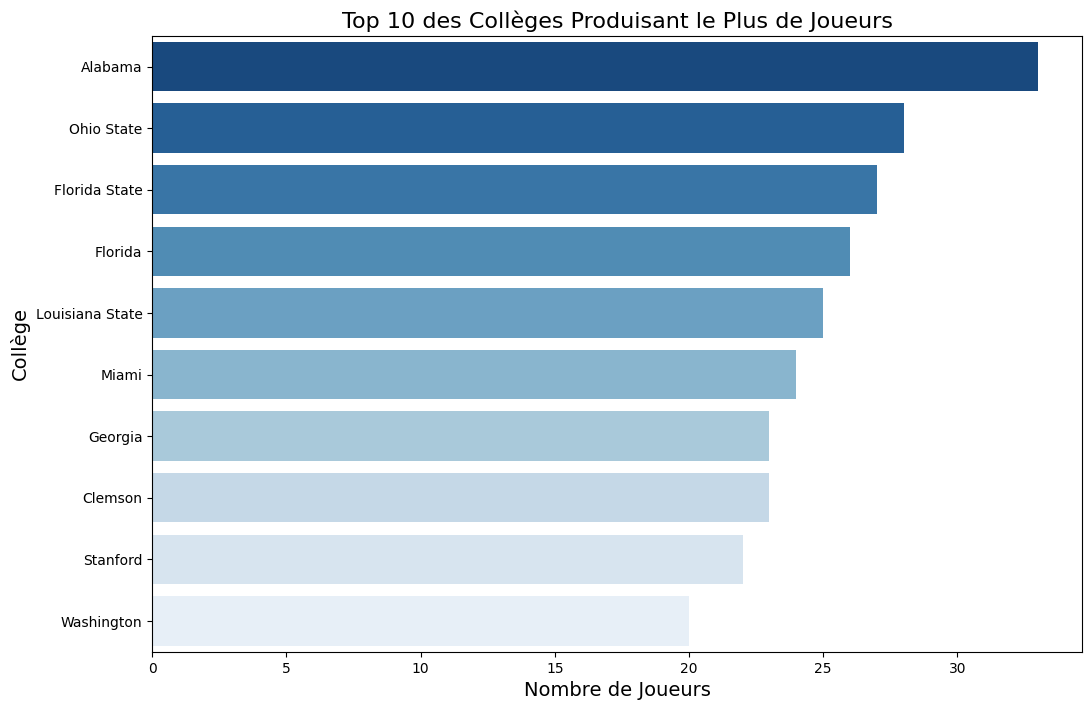

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les lignes où il n'y a pas de valeurs manquantes pour collegeName
df_players_filtered = df_players.dropna(subset=['collegeName'])

# Compter le nombre de joueurs par collegeName et sélectionner les 10 premiers
college_counts_players = df_players_filtered['collegeName'].value_counts().head(10)

# Créer un barplot horizontal avec une palette inversée
plt.figure(figsize=(12, 8))
sns.barplot(x=college_counts_players.values, y=college_counts_players.index, palette='Blues_r')

# Ajouter des titres et labels
plt.title('Top 10 des Collèges Produisant le Plus de Joueurs', fontsize=16)
plt.xlabel('Nombre de Joueurs', fontsize=14)
plt.ylabel('Collège', fontsize=14)

# Afficher le graphique
plt.show()
